One common technique for interpreting the outputs of a single classification model is kernel density estimation (KDE). Similar to a histogram, a KDE plot allows us to estimate the underlying probability density of our model.

This is particularly useful for visualising the impact of selecting different classification thresholds (i.e. deciding at what point to round a given probability to 1 or 0).

You can apply this visualisation technique to multi-task classifcation too. This uses bivariate KDE, which also generalises to multivariate KDE. Unforunately we're constrained to two tasks, given the limitation of having only two axes on 2D plots.

To achieve this, we're going to create a suitable test dataset based on the Digits classification data, train a Random Forest Classifier using two labels, and output a bivariate KDE plot using the Seaborn visualisation library.

## Preparing data for multi-task learning

To simulate multi-task learning, we're going to load three classes of the Digits data (i.e. digits 0, 1 and 2), and break this into labels for two binary tasks:

1. the digit is one
2. the digit is two

(In the case that the digit is zero, both tasks will have a False label.)

Before training our model, we'll also consolidate the two label sets into a single 2 x N set.

In [1]:
from sklearn.datasets import load_digits
import numpy as np

X, y = load_digits(return_X_y=True, n_class=3)

y_task1 = y == 1
y_task2 = y == 2

y_multitask = np.stack((y_task1,y_task2), axis=-1)

## Training a multi-task Random Forest classifier

After splitting our data into train and test sets, we'll train the classifier and split the predicted probabilities into two sets:

1. probability that the digit is one
2. probability that the digit is two

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_multitask, test_size=0.4, random_state=1234)

model = RandomForestClassifier(random_state=1234)
model.fit(X_train, y_train)

y_hat = model.predict_proba(X_test)
y_task1_hat = y_hat[0][:,1]
y_task2_hat = y_hat[1][:,1]

## Visualisation bivariate KDE with Seaborn

Seaborn (a set of extensions over Matplotlib) comes to the rescue with the built-in KDE plot function. The function accepts two data sets, one for the X-axis (in this case, task 1) and one fo the Y-axis (task 2).

We've also constrained the axis to the range (0,1). Without this, the full range of the KDE function will be plotted, going below 0% and above 100%, which doesn't make sense in the context of our problem (or any binary classification task).

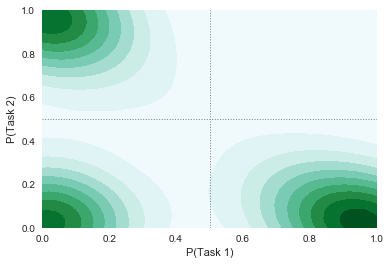

In [13]:
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
kdeplot = sns.kdeplot(y_task1_hat, y_task2_hat, shade=True, legend=True)
plt.axvline(x=0.5, color='grey', linewidth=1, linestyle='dotted')
plt.axhline(y=0.5, color='grey', linewidth=1, linestyle='dotted')
kdeplot.set(xlabel='P(Task 1)', ylabel='P(Task 2)')
plt.xlim(0,1)
plt.ylim(0,1);

The bivariate KDE plot makes the probability densities for our two learning tasks clear, and as you would expect, demonstrates that it is not likely for a given case to have a high probability for both tasks simulatenously.